In [ ]:
#Here is the link to the google drive :: https://drive.google.com/drive/folders/1h-md0Eh-Bxv-_8pU9P1znSyuqSTCQ7lV?usp=sharing
#ALERT!!!
#This notebook is designed to run in google colab, with the data in a google drive folder called mir_final.
#In order to run this notebook offline: change this path variable below to point to the local data folder ->
path = '/content/drive/MyDrive/mir_final'

#There is also another path you will need to change: in the cell below where the model is run

In [ ]:
#install dependencies 
!pip install pytorch-lightning==1.3.1 --quiet
!pip install torchaudio==0.8.1 --quiet
!pip install asteroid==0.5.1 --quiet
!pip install mir_eval --quiet
!pip install pydub --quiet

     |████████████████████████████████| 805 kB 5.3 MB/s 
     |████████████████████████████████| 398 kB 46.0 MB/s 
     |████████████████████████████████| 134 kB 50.4 MB/s 
     |████████████████████████████████| 636 kB 38.9 MB/s 
     |████████████████████████████████| 829 kB 40.3 MB/s 
     |████████████████████████████████| 1.1 MB 33.3 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 271 kB 30.1 MB/s 
     |████████████████████████████████| 144 kB 34.2 MB/s 
     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.9 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
    

In [ ]:
#import dependancies
from IPython.display import Audio
import mir_eval
import os 
from scipy.io.wavfile import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [ ]:
#This Cell Converts all files to Mono, just in case. 

rootdir = f'{path}/speech'
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    sound = AudioSegment.from_wav(os.path.join(subdir, file))
    sound = sound.set_channels(1)
    sound.export(os.path.join(subdir, file), format="wav")
rootdir = f'{path}/music'
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    sound = AudioSegment.from_wav(os.path.join(subdir, file))
    sound = sound.set_channels(1)
    sound.export(os.path.join(subdir, file), format="wav")
rootdir = f'{path}/mix'
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    sound = AudioSegment.from_wav(os.path.join(subdir, file))
    sound = sound.set_channels(1)
    sound.export(os.path.join(subdir, file), format="wav")

In [ ]:
!git clone https://github.com/MTG/PodcastMix-inference.git

Cloning into 'PodcastMix-inference'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 70 (delta 25), reused 38 (delta 8), pack-reused 0
Unpacking objects: 100% (70/70), done.
Checking out files: 100% (14/14), done.


In [ ]:
#this cell downloads the pretrained models
!curl https://raw.githubusercontent.com/MTG/Podcastmix/main/UNet_model/unet_model.py --output PodcastMix-inference/UNet_model/unet_model.py
!curl https://raw.githubusercontent.com/MTG/Podcastmix/main/UNet_model/unet_parts.py --output PodcastMix-inference/UNet_model/unet_parts.py
!curl https://raw.githubusercontent.com/MTG/Podcastmix/main/ConvTasNet_model/conv_tasnet_norm.py --output PodcastMix-inference/ConvTasNet_model/conv_tasnet_norm.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7355  100  7355    0     0  61291      0 --:--:-- --:--:-- --:--:-- 61291
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2407  100  2407    0     0  14587      0 --:--:-- --:--:-- --:--:-- 14587
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2020  100  2020    0     0  14532      0 --:--:-- --:--:-- --:--:-- 14532


In [ ]:
#this cell unpacks the downloads 
!cd PodcastMix-inference && zip -FF UNet_model/exp/tmp/best_model_splitted.zip --out UNet_model/exp/tmp/best_model.zip && unzip UNet_model/exp/tmp/best_model.zip -d UNet_model/exp/tmp/
!cd PodcastMix-inference && zip -FF ConvTasNet_model/exp/tmp/best_model_splitted.zip --out ConvTasNet_model/exp/tmp/best_model.zip && unzip ConvTasNet_model/exp/tmp/best_model.zip -d ConvTasNet_model/exp/tmp/

Fix archive (-FF) - salvage what can
 Found end record (EOCDR) - says expect 2 splits
Scanning for entries...
  Found spanning marker - expected as this is split (multi-disk) archive...
 copying: best_model.pth  (66039508 bytes)
Central Directory found...
EOCDR found ( 2 24096628)...
Archive:  UNet_model/exp/tmp/best_model.zip
replace UNet_model/exp/tmp/best_model.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UNet_model/exp/tmp/best_model.pth  
Fix archive (-FF) - salvage what can
 Found end record (EOCDR) - says expect 2 splits
Scanning for entries...
  Found spanning marker - expected as this is split (multi-disk) archive...
 copying: best_model.pth  (58849519 bytes)
Central Directory found...
EOCDR found ( 2 16906639)...
Archive:  ConvTasNet_model/exp/tmp/best_model.zip
replace ConvTasNet_model/exp/tmp/best_model.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ConvTasNet_model/exp/tmp/best_model.pth  


In [ ]:
#This Cell runs the pretrained models on a stream of data coming from Google Drive
#If you are running locally make sure to change this path.

!cd PodcastMix-inference && CUDA_VISIBLE_DEVICES=0 python forward_podcast.py \
    --test_dir=../drive/MyDrive/mir_final/mix --target_model=UNet \
    --exp_dir=UNet_model/exp/tmp --out_dir=../../../../drive/MyDrive/mir_final/UNet_separations \
    --segment=18 --sample_rate=44100 --use_gpu=1

/usr/local/lib/python3.7/dist-packages/asteroid/models/base_models.py:58: UserWarning: Other sub-components of the model might have a `sample_rate` attribute, be sure to modify them for consistency.
  UserWarning,
  0% 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:581: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:639.)
  normalized, onesided, return_complex)
100% 80/80 [00:34<00:00,  2.29it/s]


In [ ]:
#MAKE SURE THIS IS CONSISTENT WITH THE MODEL YOU APPLIED ABOVE, comment out the other model

#model = 'ConvTasNet'
model = 'UNet'

In [ ]:
#one example:
print('mixed:')
Audio(f"{path}/{model}_separations/examples_podcast/48/mixture.wav")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print('s0_est:')
Audio(f"{path}/{model}_separations/examples_podcast/48/s0_estimate.wav")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print('s1_est:')
Audio(f"{path}/{model}_separations/examples_podcast/48/s1_estimate.wav")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Here, we create a numpy matrix of all the estimated sources 
rootdir = f'{path}/{model}_separations/examples_podcast'
estimated_sources = np.ones((160,793800))
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    if file == 's0_estimate.wav':
      print(int(subdir[-2:].replace('/',''))-1,end=' ')
      estimated_sources[int(subdir[-2:].replace('/',''))-1] = read(os.path.join(subdir, file))[1]
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    if file == 's1_estimate.wav':
      print(int(subdir[-2:].replace('/',''))+79,end=' ')
      estimated_sources[int(subdir[-2:].replace('/',''))+79] = read(os.path.join(subdir, file))[1]

print()
#Here, we create a numpy matrix of all the reference sources
reference_sources = np.ones((160,793800))
rootdir = f'{path}/speech'
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    print(int(file.replace('.wav',''))-1,end=' ')
    reference_sources[int(file.replace('.wav',''))-1] = read(os.path.join(subdir, file))[1][:793800]
rootdir = f'{path}/music'
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
      print(int(file.replace('.wav',''))+79,end=' ')
      reference_sources[int(file.replace('.wav',''))+79] = read(os.path.join(subdir, file))[1][:793800]
      

32 29 30 26 23 27 28 25 22 79 21 20 77 78 59 64 60 76 74 73 71 72 70 51 68 66 69 67 62 63 65 58 61 57 55 50 52 56 54 17 18 19 15 16 11 12 14 13 6 5 7 10 8 9 3 4 0 2 1 48 46 47 45 44 43 42 39 40 34 36 37 35 33 31 53 24 75 41 38 49 112 109 110 106 103 107 108 105 102 159 101 100 157 158 139 144 140 156 154 153 151 152 150 131 148 146 149 147 142 143 145 138 141 137 135 130 132 136 134 97 98 99 95 96 91 92 94 93 86 85 87 90 88 89 83 84 80 82 81 128 126 127 125 124 123 122 119 120 114 116 117 115 113 111 133 104 155 121 118 129 
71 22 74 78 77 20 79 75 76 73 69 68 66 64 65 54 51 70 52 72 67 62 63 58 53 57 56 61 60 55 59 15 18 13 17 16 50 12 19 14 11 0 8 9 5 4 6 7 3 10 2 1 44 38 49 43 28 25 32 26 40 48 36 41 39 33 37 23 29 31 24 27 30 34 35 21 42 45 47 46 97 95 94 92 91 89 90 87 88 86 85 83 84 80 82 81 127 121 116 128 111 129 126 105 123 148 142 144 159 122 107 125 101 124 103 108 118 120 131 132 100 102 104 106 110 109 114 112 117 115 119 158 154 156 143 139 141 157 151 147 140 149 145 150

In [ ]:
#Using mir_eval to do bsseval-sources calculations, store result in pandas DataFrame
df = pd.DataFrame([],columns=['sdr','sir','sar','perm'])
for i in range(80):
  if i%10==0:
    print()
  res = mir_eval.separation.bss_eval_sources(np.vstack((reference_sources[i],reference_sources[i+79])), np.vstack((estimated_sources[i],estimated_sources[i+79])), compute_permutation=False)
  df = pd.concat([df,pd.DataFrame([res],columns=['sdr','sir','sar','perm'])])
  print('.',end='')
df = df.reset_index().drop('index',axis=1)


..........
..........
..........
..........
..........
..........
..........
..........

In [ ]:
#Take a peek at the result
df

,sdr,sir,sar,perm
0,"[-17.262860369430147, -4.15850660727726]","[9.168463329897051, 27.544499873085574]","[-16.756517694644025, -4.147933935967424]","[0, 1]"
1,"[-5.099932646554067, -8.07349210688616]","[15.427833350398998, 25.286095694161208]","[-4.938599537119726, -8.058648935246143]","[0, 1]"
2,"[-5.649338353250153, 0.5517054416570876]","[25.32523305229866, 36.587426959022906]","[-5.633142955703741, 0.5537403217789725]","[0, 1]"
3,"[11.211346440700439, -11.82185287353748]","[46.99285038409374, 22.659632713940777]","[11.212580573494193, -11.79682786065904]","[0, 1]"
4,"[-2.7181951329957856, -3.592603159587945]","[30.391641037625906, 32.8702268352902]","[-2.712105712450785, -3.5893803557688053]","[0, 1]"
...,...,...,...,...
75,"[-3.900627703766829, -9.302277657788057]","[28.350829377059668, 18.041461915963893]","[-3.8916965675035717, -9.226616927368172]","[0, 1]"
76,"[-4.762780355439451, -9.91273790572029]","[23.401477333977745, 23.333694780581315]","[-4.736348522508941, -9.890571004638417]","[0, 1]"
77,"[-4.370340336959613, -6.417664171203849]","[25.022697352643846, 27.069841426872067]","[-4.351702529661221, -6.407199507577376]","[0, 1]"
78,"[-8.87770456334055, -6.184044685643234]","[28.298775092066045, 25.985630202903003]","[-8.870451709210915, -6.170477295814934]","[0, 1]"


In [ ]:
#here we compute some aggregate statistics 
av = pd.DataFrame([[df['sdr'].mean(),df['sir'].mean(),df['sar'].mean()]],columns = ['mean sdr','mean sir','mean sar'])
orig = pd.DataFrame([[df[:20]['sdr'].mean(),df[:20]['sir'].mean(),df[:20]['sar'].mean()]],columns = ['mean sdr','mean sir','mean sar'])
expan = pd.DataFrame([[df[21:]['sdr'].mean(),df[21:]['sir'].mean(),df[21:]['sar'].mean()]],columns = ['mean sdr','mean sir','mean sar'])
all = pd.concat([av,orig,expan])
all.index = ['all 80','original 20','supplementary 60']

In [ ]:
#The results are saved for presentation in the paper
all.to_csv(f'{path}/{model}_eval.csv')

Text(0.5, 0.98, 'UNet: Mean SDR over all 80 Podcasts')

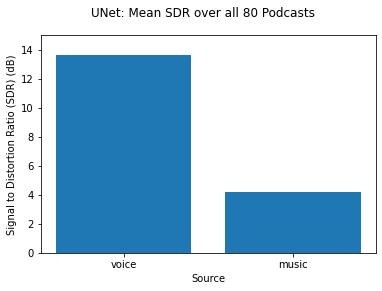

In [ ]:
plt.bar(['voice','music'],av['mean sdr'][0])
plt.ylabel('Signal to Distortion Ratio (SDR) (dB)')
plt.xlabel('Source')
plt.ylim([0,15])
plt.suptitle(f'{model}: Mean SDR over all 80 Podcasts')

Text(0.5, 0.98, 'UNet: Mean SIR over all 80 Podcasts')

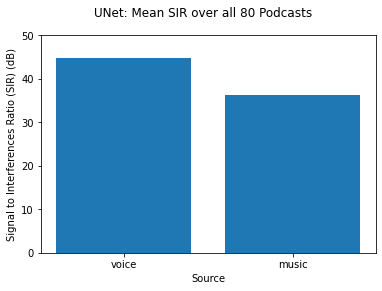

In [ ]:
plt.bar(['voice','music'],av['mean sir'][0])
plt.ylabel('Signal to Interferences Ratio (SIR) (dB)')
plt.xlabel('Source')
plt.ylim([0,50])
plt.suptitle(f'{model}: Mean SIR over all 80 Podcasts')

Text(0.5, 0.98, 'UNet: Mean SAR over all 80 Podcasts')

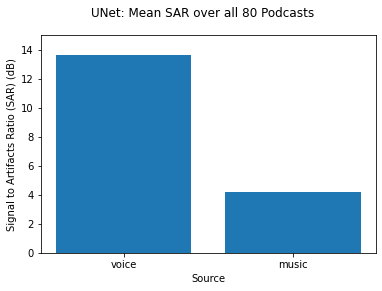

In [ ]:
plt.bar(['voice','music'],av['mean sar'][0])
plt.ylabel('Signal to Artifacts Ratio (SAR) (dB)')
plt.xlabel('Source')
plt.ylim([0,15])
plt.suptitle(f'{model}: Mean SAR over all 80 Podcasts')

Text(0.5, 0.98, 'UNet: Mean SDR over original 20 Podcasts')

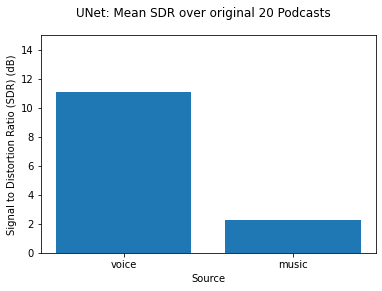

In [ ]:
plt.bar(['voice','music'],orig['mean sdr'][0])
plt.ylabel('Signal to Distortion Ratio (SDR) (dB)')
plt.xlabel('Source')
plt.ylim([0,15])
plt.suptitle(f'{model}: Mean SDR over original 20 Podcasts')

Text(0.5, 0.98, 'UNet: Mean SIR over original 20 Podcasts')

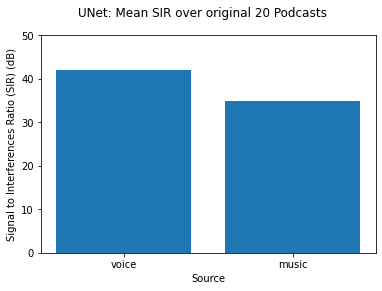

In [ ]:
plt.bar(['voice','music'],orig['mean sir'][0])
plt.ylabel('Signal to Interferences Ratio (SIR) (dB)')
plt.xlabel('Source')
plt.ylim([0,50])
plt.suptitle(f'{model}: Mean SIR over original 20 Podcasts')

Text(0.5, 0.98, 'UNet: Mean SAR over original 20 Podcasts')

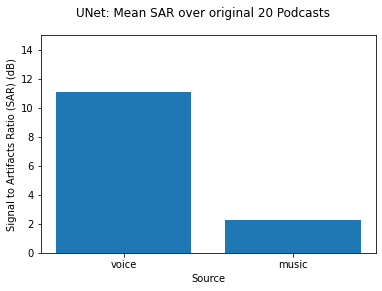

In [ ]:
plt.bar(['voice','music'],orig['mean sar'][0])
plt.ylabel('Signal to Artifacts Ratio (SAR) (dB)')
plt.xlabel('Source')
plt.ylim([0,15])
plt.suptitle(f'{model}: Mean SAR over original 20 Podcasts')

Text(0.5, 0.98, 'UNet: Mean SDR over expansion 60 Podcasts')

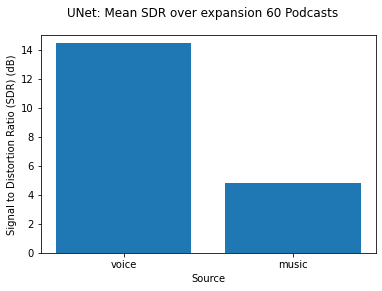

In [ ]:
plt.bar(['voice','music'],expan['mean sdr'][0])
plt.ylabel('Signal to Distortion Ratio (SDR) (dB)')
plt.xlabel('Source')
plt.ylim([0,15])
plt.suptitle(f'{model}: Mean SDR over expansion 60 Podcasts')

Text(0.5, 0.98, 'ConvTasNet: Mean SIR over expansion 60 Podcasts')

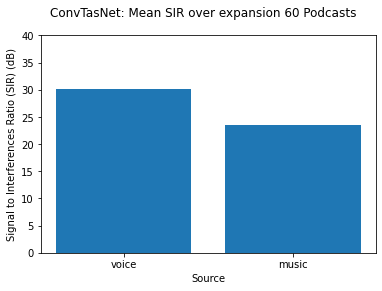

In [ ]:
plt.bar(['voice','music'],expan['mean sir'][0])
plt.ylabel('Signal to Interferences Ratio (SIR) (dB)')
plt.xlabel('Source')
plt.ylim([0,50])
plt.suptitle(f'{model}: Mean SIR over expansion 60 Podcasts')

Text(0.5, 0.98, 'UNet: Mean SAR over expansion 60 Podcasts')

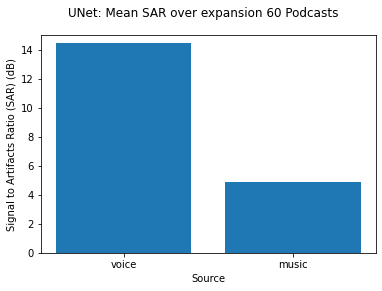

In [ ]:
plt.bar(['voice','music'],expan['mean sar'][0])
plt.ylabel('Signal to Artifacts Ratio (SAR) (dB)')
plt.xlabel('Source')
plt.ylim([0,15])
plt.suptitle(f'{model}: Mean SAR over expansion 60 Podcasts')